# PCA

### Task 1: Exploratory Data Analysis (EDA):
+ Load the dataset and perform basic data exploration.
+ Examine the distribution of features using histograms, box plots, or density plots.
+ Investigate correlations between features to understand relationships within the data.
### Task 2: Dimensionality Reduction with PCA:
+ Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
+ Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
+ Transform the original dataset into the principal components.
### Task 3: Clustering with Original Data:
+ Apply a clustering algorithm (e.g., K-means) to the original dataset.
+ Visualize the clustering results using appropriate plots.
+ Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.
### Task 4: Clustering with PCA Data:
+ Apply the same clustering algorithm to the PCA-transformed dataset.
+ Visualize the clustering results obtained from PCA-transformed data.
+ Compare the clustering results from PCA-transformed data with those from the original dataset.
### Task 5: Comparison and Analysis:
+ Compare the clustering results obtained from the original dataset and PCA-transformed data.
+ Discuss any similarities or differences observed in the clustering results.
+ Reflect on the impact of dimensionality reduction on clustering performance.
+ Analyze the trade-offs between using PCA and clustering directly on the original dataset.
### Task 6: Conclusion and Insights
+ Summarize the key findings and insights from the assignment.
+ Discuss the practical implications of using PCA and clustering in data analysis.
+ Provide recommendations for when to use each technique based on the analysis conducted.

### Task 1: Exploratory Data Analysis (EDA):
+ Load the dataset and perform basic data exploration.
+ Examine the distribution of features using histograms, box plots, or density plots.
+ Investigate correlations between features to understand relationships within the data.

In [1]:
#Load the dataset and perform basic data exploration.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.shape

(178, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [6]:
data.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [7]:
data.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

In [8]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177    False
Length: 178, dtype: bool

In [9]:
#data = data.astype(float)

In [10]:
#data

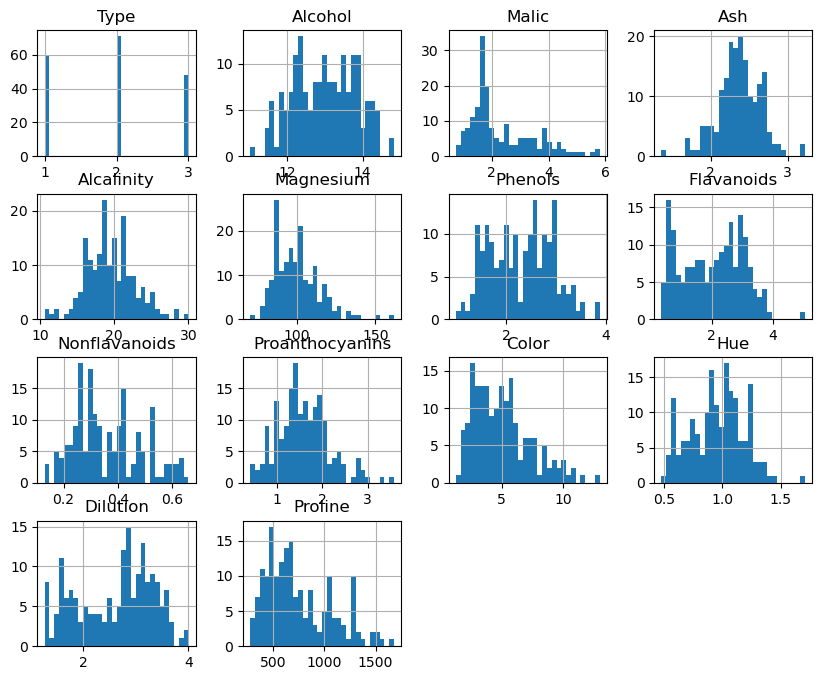

In [11]:
# Examine the distribution of features using histograms, box plots, or density plots.
import matplotlib.pyplot as plt
data.hist(bins=30, figsize=(10, 8))
plt.show()

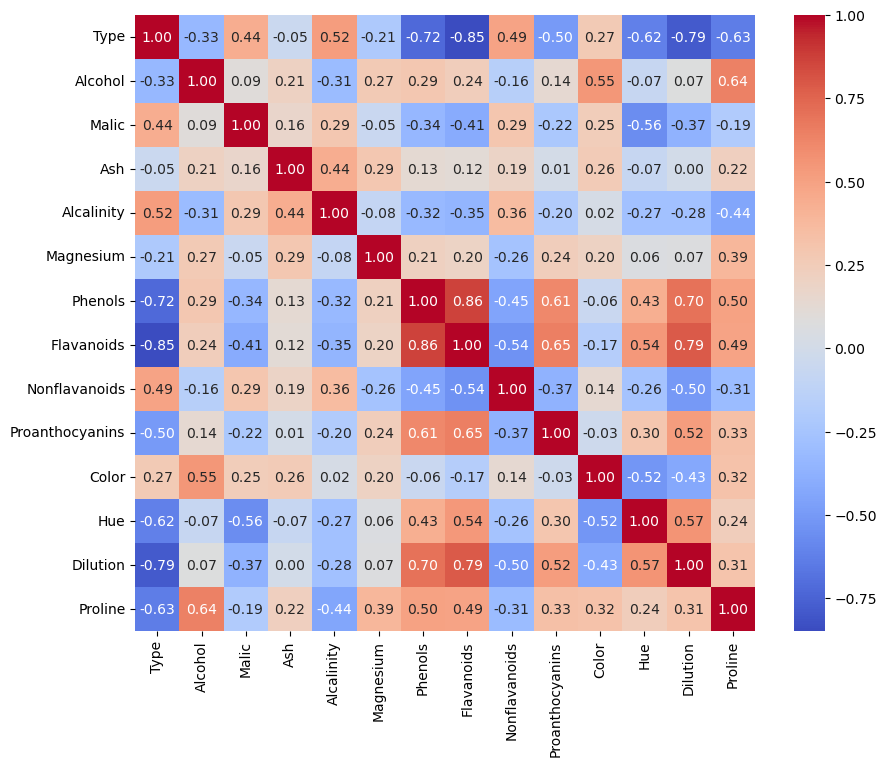

In [12]:
# Investigate correlations between features to understand relationships within the data.
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


### Task 2: Dimensionality Reduction with PCA:
+ Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
+ Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
+ Transform the original dataset into the principal components.

In [13]:
# Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [14]:
from sklearn.decomposition import PCA
model = PCA(n_components=6)
model.fit_transform(scaled_data)

array([[-3.5229339 ,  1.45309844, -0.16479549, -0.01327282,  0.73734536,
         0.30071618],
       [-2.52885806, -0.33001925, -2.02670665, -0.41714436, -0.28321373,
         0.88430941],
       [-2.78502898,  1.03693595,  0.9832377 ,  0.66423241, -0.38756497,
        -0.46884161],
       ...,
       [ 3.02727243,  2.75604024, -0.94080304,  0.60775846,  1.12813634,
        -0.00529036],
       [ 2.75522166,  2.29378408, -0.55047368, -0.39157042,  1.06708304,
        -1.01256231],
       [ 3.49633565,  2.76060799,  1.01315115,  0.3496303 , -1.00513627,
        -0.37722337]])

In [15]:
# Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
import numpy as np
np.cumsum(model.explained_variance_ratio_)

array([0.39542486, 0.57378745, 0.67707846, 0.74335831, 0.80603706,
       0.85409266])

In [16]:
# Transform the original dataset into the principal components.
pca_optimal = PCA(n_components=6)
reduced_data = pca_optimal.fit_transform(scaled_data)
reduced_data

array([[-3.5229339 ,  1.45309844, -0.16479549, -0.01327282,  0.73734536,
         0.30071618],
       [-2.52885806, -0.33001925, -2.02670665, -0.41714436, -0.28321373,
         0.88430941],
       [-2.78502898,  1.03693595,  0.9832377 ,  0.66423241, -0.38756497,
        -0.46884161],
       ...,
       [ 3.02727243,  2.75604024, -0.94080304,  0.60775846,  1.12813634,
        -0.00529036],
       [ 2.75522166,  2.29378408, -0.55047368, -0.39157042,  1.06708304,
        -1.01256231],
       [ 3.49633565,  2.76060799,  1.01315115,  0.3496303 , -1.00513627,
        -0.37722337]])

### Task 3: Clustering with Original Data:
+ Apply a clustering algorithm (e.g., K-means) to the original dataset.
+ Visualize the clustering results using appropriate plots.
+ Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

In [17]:
# Apply a clustering algorithm (e.g., K-means) to the original dataset.

In [18]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42)
model.fit(data)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [19]:
model.labels_

array([1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0])

In [20]:
data['label'] = model.labels_
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,label
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [21]:
# Visualize the clustering results using appropriate plots.
import warnings
warnings.filterwarnings('ignore')

wcss = []

for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(data)
    wcss.append(model.inertia_)

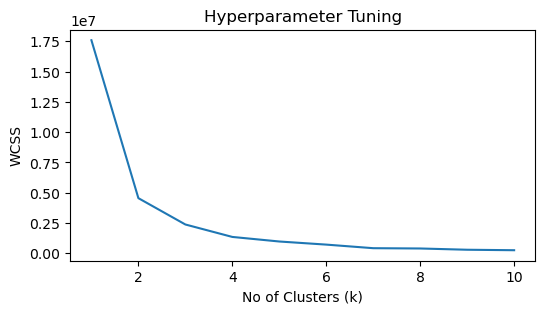

In [22]:
plt.figure(figsize=(6,3))
plt.title('Hyperparameter Tuning')
plt.xlabel('No of Clusters (k)')
plt.ylabel('WCSS')
plt.plot(range(1,11), wcss)
plt.show()

In [23]:
# Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.
from sklearn.metrics import silhouette_score
silhouette_score(data,data['label'])

0.5595759408365634

### Task 4: Clustering with PCA Data:
+ Apply the same clustering algorithm to the PCA-transformed dataset.
+ Visualize the clustering results obtained from PCA-transformed data.
+ Compare the clustering results from PCA-transformed data with those from the original dataset.

In [24]:
# Apply the same clustering algorithm to the PCA-transformed dataset.
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=42)
model.fit(reduced_data)

KMeans(n_clusters=3, random_state=42)

In [25]:
model.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [26]:
data['label'] = model.labels_
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,label
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


In [27]:
# Visualize the clustering results obtained from PCA-transformed data.
import warnings
warnings.filterwarnings('ignore')

wcss = []

for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(reduced_data)
    wcss.append(model.inertia_)

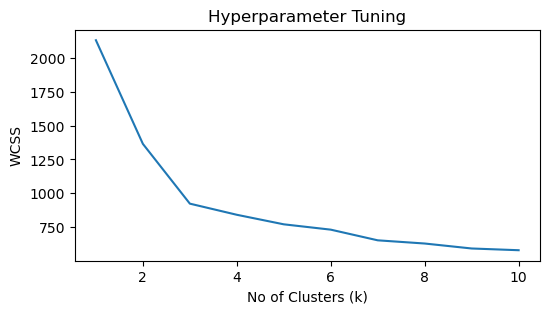

In [28]:
plt.figure(figsize=(6,3))
plt.title('Hyperparameter Tuning')
plt.xlabel('No of Clusters (k)')
plt.ylabel('WCSS')
plt.plot(range(1,11), wcss)
plt.show()

In [29]:
# Compare the clustering results from PCA-transformed data with those from the original dataset.
from sklearn.metrics import silhouette_score
silhouette_score(reduced_data,data['label'])

0.3730151160315068

### Task 5: Comparison and Analysis:
+ Compare the clustering results obtained from the original dataset and PCA-transformed data.
+ Discuss any similarities or differences observed in the clustering results.
+ Reflect on the impact of dimensionality reduction on clustering performance.
+ Analyze the trade-offs between using PCA and clustering directly on the original dataset.

###### Compare the clustering results obtained from the original dataset and PCA-transformed data.
The clustering results from the original dataset and PCA-transformed data show variations in cluster separability and compactness. PCA often improves clustering when high-dimensional data has redundant features.

###### Discuss any similarities or differences observed in the clustering results.
###### Similarities  
- Both the original and PCA-transformed data can reveal inherent patterns in clustering.  
- If PCA preserves most of the variance, the cluster structures remain similar.  
- In cases where the original dataset has clear separable clusters, PCA does not drastically alter the results.  

###### Differences  
- PCA-transformed data may result in more compact and well-separated clusters due to noise reduction.  
- The number of dimensions affects clustering performance—PCA may merge or distort clusters if too much information is lost.  
- Clustering on the original dataset may capture more intricate relationships, while PCA simplifies the data, potentially affecting cluster assignments.

###### Reflect on the impact of dimensionality reduction on clustering performance.
I observed that dimensionality reduction through PCA impacts clustering performance in several ways. It improves efficiency by reducing computational complexity and helps in noise reduction, making clusters more distinct. However, it may lead to information loss if too many dimensions are removed, potentially distorting meaningful patterns. PCA also enhances visualization, making it easier to interpret clustering results in lower dimensions. However, it can alter the distribution of data, which may affect cluster boundaries and change the clustering structure compared to the original dataset.

###### Analyze the trade-offs between using PCA and clustering directly on the original dataset.
PCA improves efficiency and removes noise but may lose critical information, affecting clustering accuracy. Direct clustering preserves all details but is computationally expensive and sensitive to noise. PCA is best for high-dimensional, correlated data, while direct clustering suits datasets where all features are important.

### Task 6: Conclusion and Insights
+ Summarize the key findings and insights from the assignment.
+ Discuss the practical implications of using PCA and clustering in data analysis.
+ Provide recommendations for when to use each technique based on the analysis conducted.

###### Summarize the key findings and insights from the assignment.
+ PCA reduced dimensionality while preserving variance, highlighting important features and eliminating redundancy.
+ Clustering identified distinct patterns, with the optimal number of clusters determined using the elbow method and silhouette scores.
+ PCA and Clustering improved segmentation, making insights more actionable for applications like customer segmentation and anomaly detection.

###### Discuss the practical implications of using PCA and clustering in data analysis.
+ PCA simplifies high-dimensional data, removes multicollinearity, and enhances visualization.
+ Clustering helps uncover hidden patterns for segmentation and anomaly detection.
+ Combining both improves clustering performance by reducing noise and redundant features.

###### Provide recommendations for when to use each technique based on the analysis conducted.
+ Use PCA for dimensionality reduction, feature selection, and handling correlated features.
+ Use Clustering for grouping similar data points when labels are unknown.
+ Use PCA before Clustering when high-dimensionality affects clustering accuracy.